<a href="https://colab.research.google.com/github/KuroiYoshiko/Datasets-analysis/blob/master/stroke_dataset_m_karolewska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milena Karolewska, 4 rok, Informatyka**

Healthcare Stroke Dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
uploaded = files.upload()

In [ ]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col=False)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Count missing data
column_names = stroke.columns
counter = stroke[column_names].isnull().sum()
print (counter)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## **Czyszczenie danych**

id - 0%
gender - 0%
age - 0%
hypertension - 0%
heart_disease - 0%
ever_married - 0%
work_type - 0%
Residence_type - 0%
avg_glucose_level - 0%
bmi - 4%
smoking_status - 0%
stroke - 0%


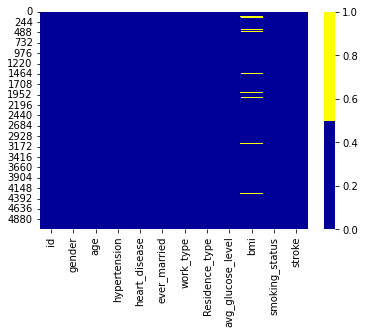

In [ ]:
#HEATMAP

cols = stroke.columns[:30]
colours = ['#000099', '#ffff00']
sns.heatmap(stroke[cols].isnull(), cmap=sns.color_palette(colours))

for col in stroke.columns:
    pct_missing = np.mean(stroke[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

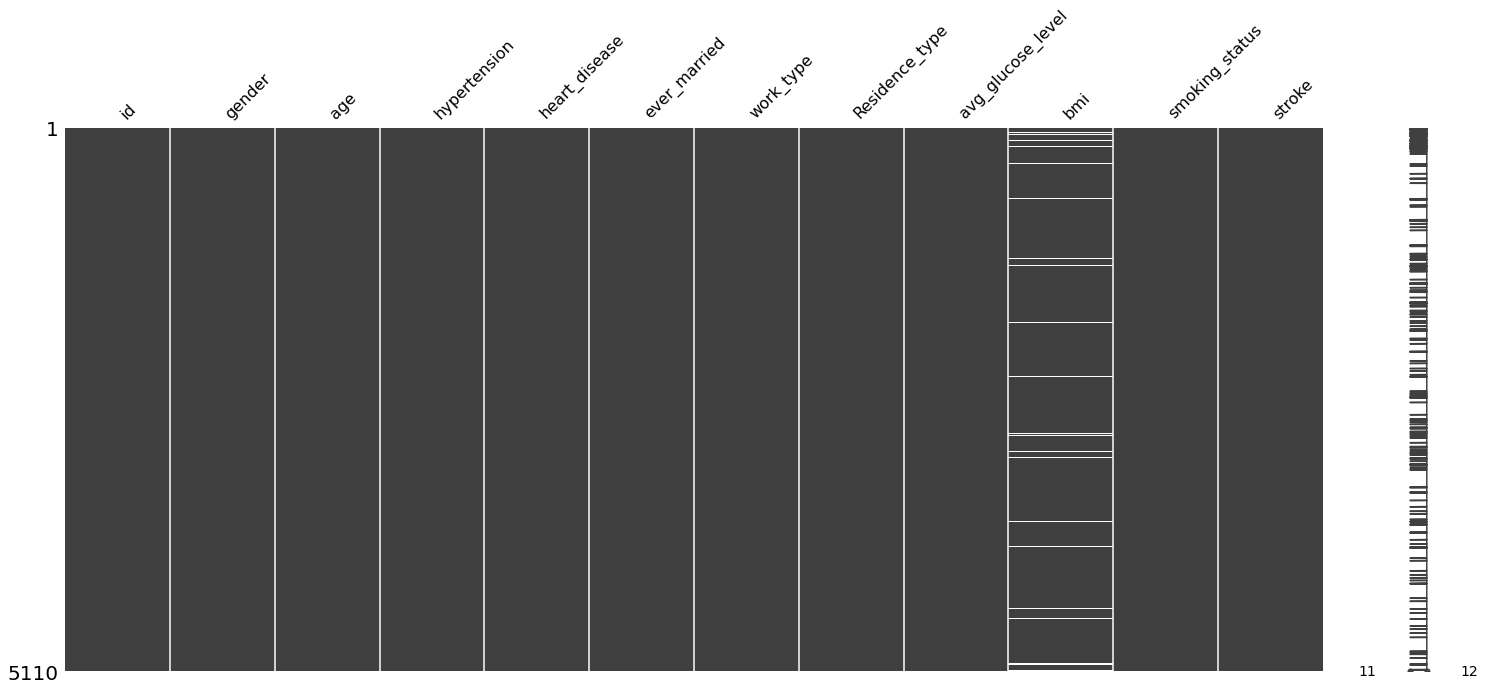

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(stroke)
plt.show()

Brakujących wartości w kolumnie 'bmi' mamy jedynie 201 na 5110 obserwacji. Najlepiej więc będzie usunąć jedynie wiersze, które wartości 'bmi' nie zawierają.

In [ ]:
for col in stroke.columns:
    missing = stroke[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        stroke['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in stroke.columns if 'ismissing' in col]
stroke['num_missing'] = stroke[ismissing_cols].sum(axis=1)


ind_missing = stroke[stroke['num_missing'] > 0].index


stroke = stroke.drop(ind_missing, axis=0)
print(stroke)

created missing indicator for: bmi
         id  gender   age  ...  stroke  bmi_ismissing num_missing
0      9046    Male  67.0  ...       1          False           0
2     31112    Male  80.0  ...       1          False           0
3     60182  Female  49.0  ...       1          False           0
4      1665  Female  79.0  ...       1          False           0
5     56669    Male  81.0  ...       1          False           0
...     ...     ...   ...  ...     ...            ...         ...
5104  14180  Female  13.0  ...       0          False           0
5106  44873  Female  81.0  ...       0          False           0
5107  19723  Female  35.0  ...       0          False           0
5108  37544    Male  51.0  ...       0          False           0
5109  44679  Female  44.0  ...       0          False           0

[4909 rows x 14 columns]


Sprawdzamy, czy usunęło się wszystko

In [ ]:
# Count missing data
column_names = stroke.columns
counter = stroke[column_names].isnull().sum()
print (counter)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
bmi_ismissing        0
num_missing          0
dtype: int64


In [ ]:
# Drop added columns
cols_to_drop = ['bmi_ismissing','num_missing']
stroke = stroke.drop(cols_to_drop, axis=1)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Jak widzimy, kolumny gender, ever_married, work_type, Residence_type i smoking_status są stringami. Jeśli jest w ich mała ilość unikalnych wartości można zastanowić się, czy zawarte w nich dane można przedstawić w inny sposób.

In [ ]:
print("gender unique:", stroke['gender'].unique())
print("ever_married unique:", stroke['ever_married'].unique())
print("work_type unique:", stroke['work_type'].unique())
print("Residence_type unique:", stroke['Residence_type'].unique())
print("smoking_status unique:", stroke['smoking_status'].unique())

gender unique: ['Male' 'Female' 'Other']
ever_married unique: ['Yes' 'No']
work_type unique: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type unique: ['Urban' 'Rural']
smoking_status unique: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Maksymalna ilość wartości unikalnych to 5, więc możemy przy użyciu LabelEncodera przekształcić stringi w odpowiedniki numeryczne.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(stroke['gender'])
gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_mapping)
stroke.gender = le.fit_transform(stroke.gender)

le.fit(stroke['ever_married'])
ever_married_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_mapping)
stroke.ever_married = le.fit_transform(stroke.ever_married)

le.fit(stroke['work_type'])
work_type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(work_type_mapping)
stroke.work_type = le.fit_transform(stroke.work_type)

le.fit(stroke['Residence_type'])
residence_type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(residence_type_mapping)
stroke.Residence_type = le.fit_transform(stroke.Residence_type)

le.fit(stroke['smoking_status'])
smoking_status_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(smoking_status_mapping)
stroke.smoking_status = le.fit_transform(stroke.smoking_status)



{'Female': 0, 'Male': 1, 'Other': 2}
{'No': 0, 'Yes': 1}
{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
{'Rural': 0, 'Urban': 1}
{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


Możemy również pozbyć się kolumny id - nie będzie nam ona potrzebna.

In [ ]:
stroke = stroke.drop("id", axis=1)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


Możemy sprawdzić, czy nie ma duplikatów.

In [ ]:
duplicated_rows= stroke[stroke.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


## **Analiza EDA**

**Przedstawienie ogólnych zależności ludzi po udarze i zdrowych**

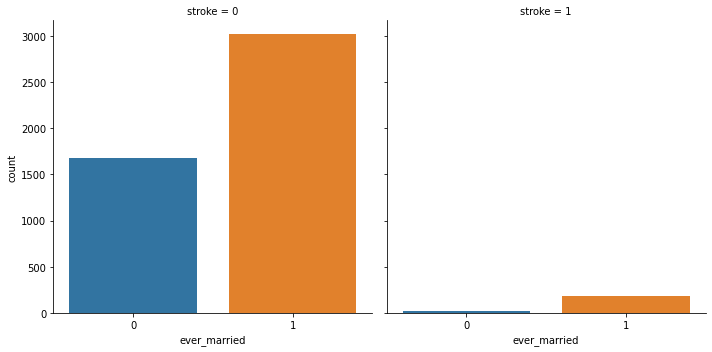

In [ ]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=stroke)

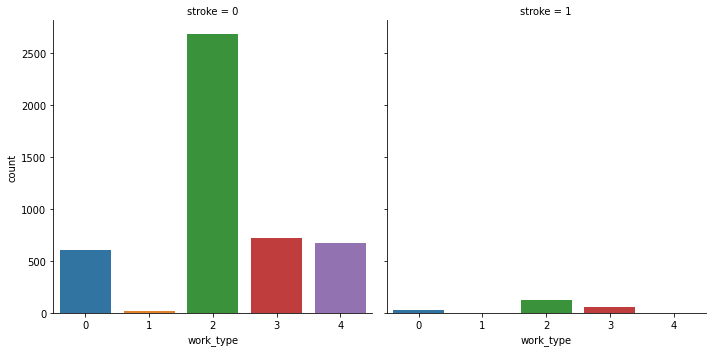

In [ ]:
sns.catplot(x='work_type',kind='count',col='stroke',data=stroke)

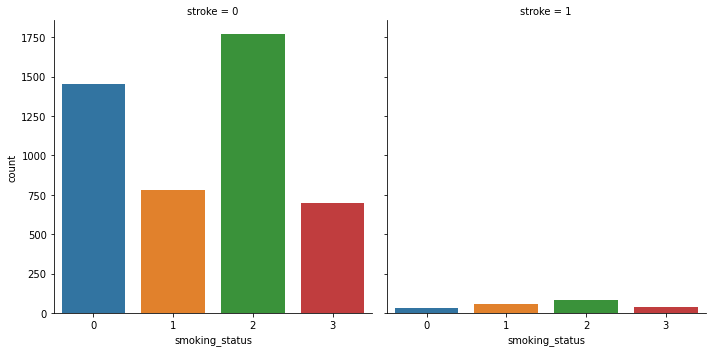

In [ ]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=stroke)

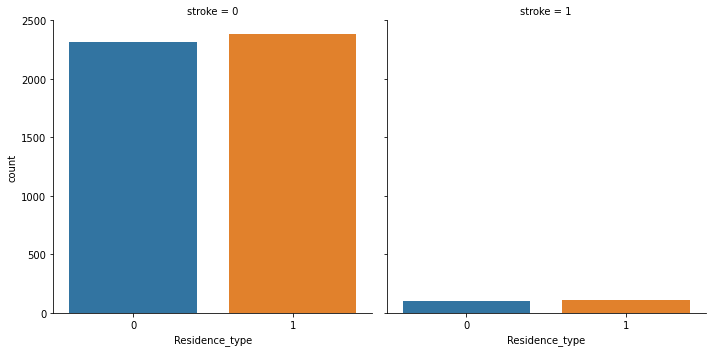

In [ ]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=stroke)

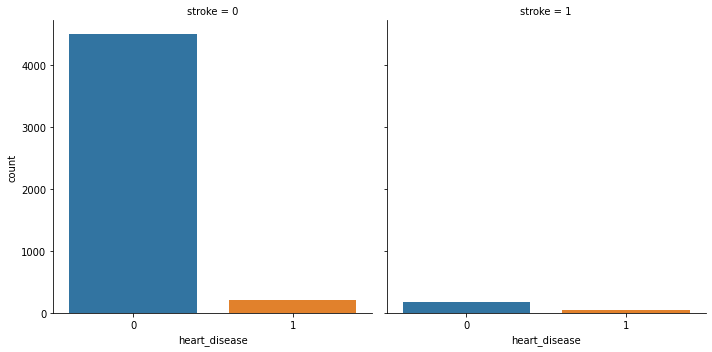

In [ ]:
sns.catplot(x='heart_disease',kind='count',col='stroke',data=stroke)

**Ilość osób z udarem**

Można zobaczyć, że na 4909 badanych 209 miało udar.

In [ ]:
print(stroke['stroke'].value_counts())

0    4700
1     209
Name: stroke, dtype: int64


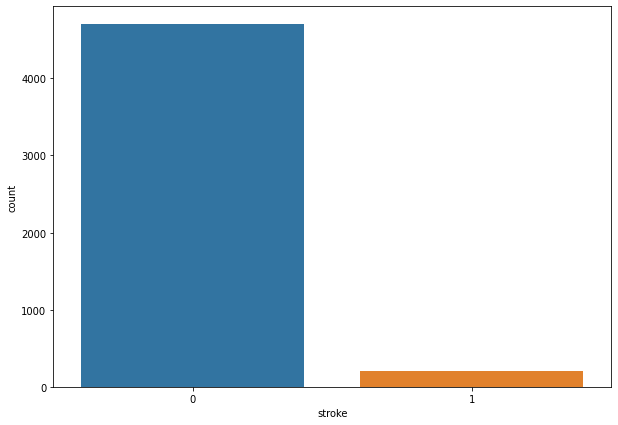

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'stroke',
              data = stroke,
              order = stroke['stroke'].value_counts().index)

**Wiek badanych**

Możemy zobaczyć, że badania zostały przeprowadzone na bardzo szerokiej grupie ludzi w wieku od niemowląt do 82 lat. Nie można powiedzieć, że jakiś przedział  grup ma dużą przewagę liczebną. Od wartości 0 do około 55 można zaobserwować  delikatny wzrost liczebności ludzi, po czym obserwujemy niewielki spadek.

In [ ]:
print(stroke['age'].describe())

count    4909.000000
mean       42.865374
std        22.555115
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64


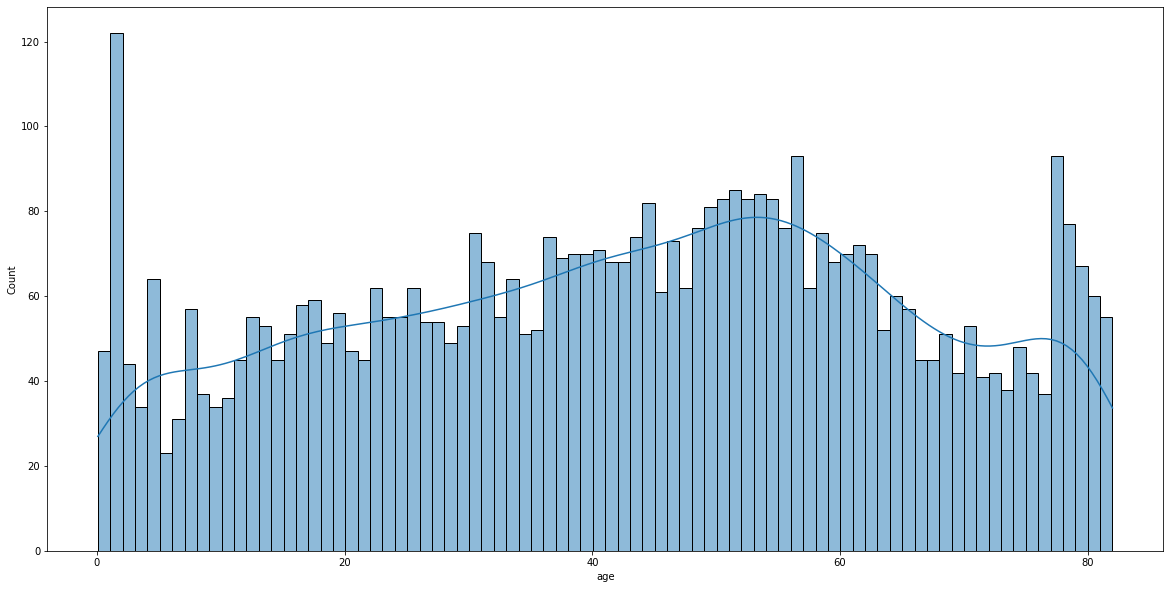

In [ ]:
plt.figure(figsize=(20,10))
df_numeric = stroke.select_dtypes(include='number')
df_numeric
sns.histplot(df_numeric['age'], bins=82, kde=True)

**Płeć badanych**

Jeśli chodzi o płeć to można stwierdzić, że w badaniach wzięło udział o około 1/3 mniej mężczyzn niż kobiet. Jeśli chodzi o osoby indetyfikujące się inaczej, to była tylko jedna taka badana osoba.

In [ ]:
print(gender_mapping)

{'Female': 0, 'Male': 1, 'Other': 2}


In [ ]:
print(stroke['gender'].value_counts())

0    2897
1    2011
2       1
Name: gender, dtype: int64


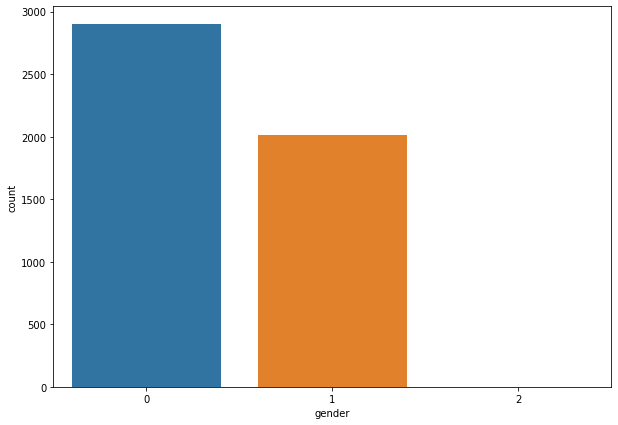

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'gender',
              data = df_numeric,
              order = df_numeric['gender'].value_counts().index)

**Zależność statusu palacza od udaru**

Z wykresu widać, że osoby, które miały udar w dużej mierze znajdują się w grupach osób, które rzuciły palenie bądź osób nigdy nie palących. Na tej podstawie trudno więc stwierdzić, w jaki sposób palenie wpływa na udar.

In [ ]:
print(smoking_status_mapping)

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


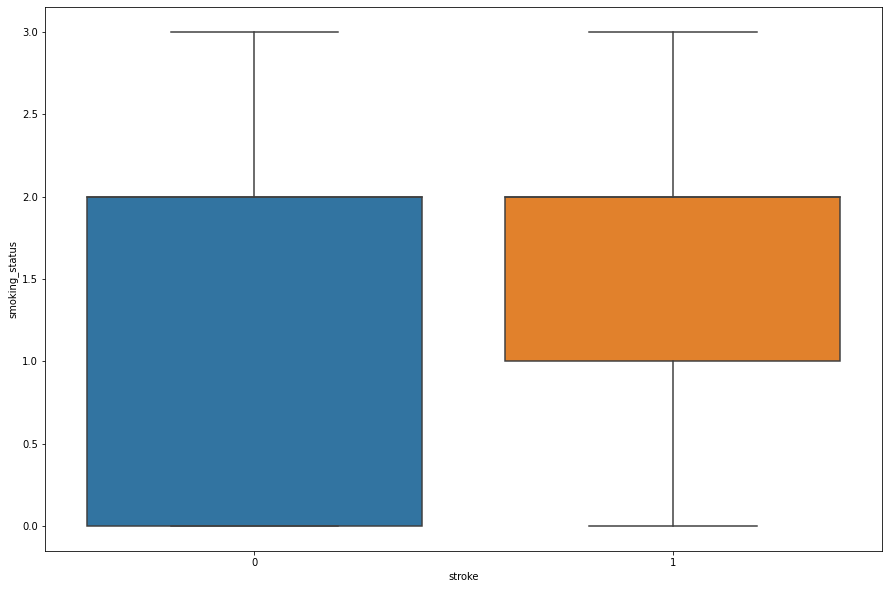

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="stroke", y="smoking_status", data=stroke)

 **Zależność wieku od udaru**

Można zobaczyć, że większa częśc ludzi po udarze to osoby w wieku od około 55 do 82 lat.Poniżej tych wartości znajdują się również mniej liczne przypadki w zakresie ok 55-35 oraz osobny przypadek poniżej 20 roku życia.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


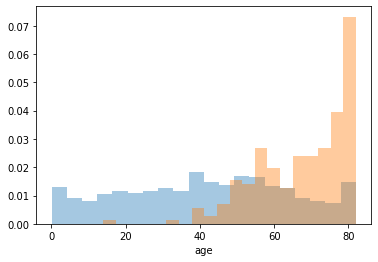

In [ ]:
sns.distplot(stroke.loc[stroke['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(stroke.loc[stroke['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

**Zależność BMI od udaru**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


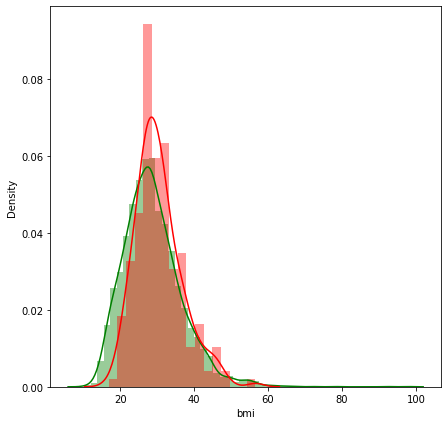

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(stroke[stroke['stroke'] == 0]['bmi'],color='green')
sns.distplot(stroke[stroke['stroke'] == 1]['bmi'],color='red')

**Zależność glukozy od udaru**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(20.0, 300.0)

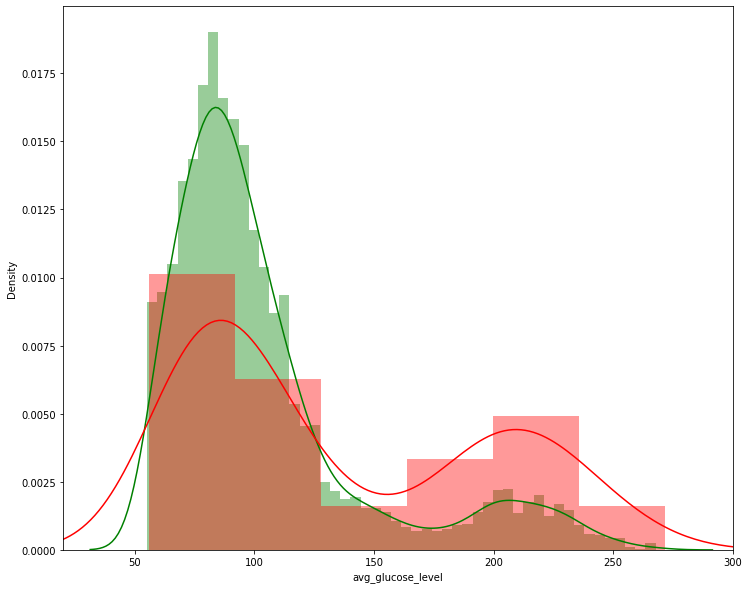

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(stroke[stroke['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(stroke[stroke['stroke'] == 1]['avg_glucose_level'],color='red')
plt.xlim([20,300])

## **Utworzenie klasyfikatora z wykorzystaniem XGBoost**

In [ ]:
# feature selection
feature_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
x = stroke[feature_cols]
y = stroke.stroke

# splitting the data into traing and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

XGB = XGBClassifier(
    base_score = np.mean(Y_train),
    learning_rate = 0.1,
    nrounds = 100,
    max_delta_step = 1,
    n_estimators = 100,
    max_depth = 10,
    reg_lambda = 1,
    reg_alpha = 1,
    eta = 1,
    gamma = 1,
    colsample_bylevel = 1,
    colsample_bytree = 1,
    min_child_weight = 1,
    random_state = 10,
    scale_pos_weight = 10,
    seed=10
)

XGB.fit(X_train, Y_train)
predicted_values_XGB = XGB.predict(X_test)

print('XGBoost Accuracy_score: ',accuracy_score(Y_test, predicted_values_XGB))
print('XGBoost confusion_matrix: \n', confusion_matrix(predicted_values_XGB, Y_test))


XGBoost Accuracy_score:  0.9236252545824847
XGBoost confusion_matrix: 
 [[901  37]
 [ 38   6]]


### **Strojenie**

Po ręcznym dostrojeniu modelu accuracy wzrosło o około 3,56%. Pomimo prób zmiany różnych parametrów był to najlepszy uzyskany wynik.


In [ ]:
XGB = XGBClassifier(
    base_score = 0.5,
    learning_rate = 0.1,
    nrounds = 4000,
    max_delta_step = 0,
    max_depth = 7,
    reg_alpha=0,
    eta = 0,
    gamma = 0,
    colsample_bylevel = 0.7,
    colsample_bytree = 0.7,
    min_child_weight = 0,
    random_state = 0,
    subsample = 0.5,
    seed=0
)

XGB.fit(X_train, Y_train)
predicted_values_XGB = XGB.predict(X_test)

print('XGBoost Accuracy_score: ',accuracy_score(Y_test, predicted_values_XGB))
print('XGBoost confusion_matrix: \n', confusion_matrix(predicted_values_XGB, Y_test))

XGBoost Accuracy_score:  0.9592668024439919
XGBoost confusion_matrix: 
 [[939  40]
 [  0   3]]


## **Zadanie dodatkowe**

Dla dobranych ręcznie parametrów klasyfikatora XGBoost zbudowane zostaną 2 oddzielne klasyfikatory dla kobiet i mężczyzn w celu porównania uzyskanych wyników.

In [ ]:
print(gender_mapping)

{'Female': 0, 'Male': 1, 'Other': 2}


In [ ]:
stroke_female = stroke[stroke['gender'] == 0]
stroke_male = stroke[stroke['gender'] == 1]

In [ ]:
stroke_female.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,0,81.0,1,0,1,2,0,80.43,29.7,2,1


In [ ]:
stroke_male.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
16,1,64.0,0,1,1,2,1,191.61,37.5,3,1


### **Utworzenie klasyfikatora**

In [ ]:
# feature selection
feature_cols = ['age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
x_female = stroke_female[feature_cols]
y_female = stroke_female.stroke

x_male = stroke_male[feature_cols]
y_male = stroke_male.stroke

# splitting the data into traing and test set
X_train_female, X_test_female, Y_train_female, Y_test_female = train_test_split(x_female, y_female, test_size = 0.2, random_state=0)
X_train_male, X_test_male, Y_train_male, Y_test_male = train_test_split(x_male, y_male, test_size = 0.2, random_state=0)

**Dla kobiet**

In [ ]:
XGB = XGBClassifier(
    base_score = 0.5,
    learning_rate = 0.1,
    nrounds = 4000,
    max_delta_step = 0,
    max_depth = 7,
    reg_alpha=0,
    eta = 0,
    gamma = 0,
    colsample_bylevel = 0.7,
    colsample_bytree = 0.7,
    min_child_weight = 0,
    random_state = 0,
    subsample = 0.5,
    seed=0
)

XGB.fit(X_train_female, Y_train_female)
predicted_values_XGB_female = XGB.predict(X_test_female)

print('XGBoost Accuracy_score: ',accuracy_score(Y_test_female, predicted_values_XGB_female))
print('XGBoost confusion_matrix: \n', confusion_matrix(predicted_values_XGB_female, Y_test_female))

XGBoost Accuracy_score:  0.9603448275862069
XGBoost confusion_matrix: 
 [[557  22]
 [  1   0]]


**Dla mężczyzn**

In [ ]:
XGB.fit(X_train_male, Y_train_male)
predicted_values_XGB_male = XGB.predict(X_test_male)

print('XGBoost Accuracy_score: ',accuracy_score(Y_test_male, predicted_values_XGB_male))
print('XGBoost confusion_matrix: \n', confusion_matrix(predicted_values_XGB_male, Y_test_male))

XGBoost Accuracy_score:  0.9330024813895782
XGBoost confusion_matrix: 
 [[375  26]
 [  1   1]]


Jak można zauważyć, wyniki nieznacznie się różnią (2,73%). Dla kobiet wynik accuracy jest lepszy i osiąga około 96,03%. Dla mężczyzn jest to 93,30%. Różnica może wynikać między innymi z tego, że w badaniu wzięło udział o 886 więcej kobiet niż mężczyzn. Kolejną przyczyną może być to, że kobiet po udarze było w tym gronie więcej niż mężczyzn, co po nauce modelu przełożyło się na większe accuracy.

In [ ]:
--print(stroke['gender'].value_counts())

0    2897
1    2011
2       1
Name: gender, dtype: int64


In [ ]:
!pip list

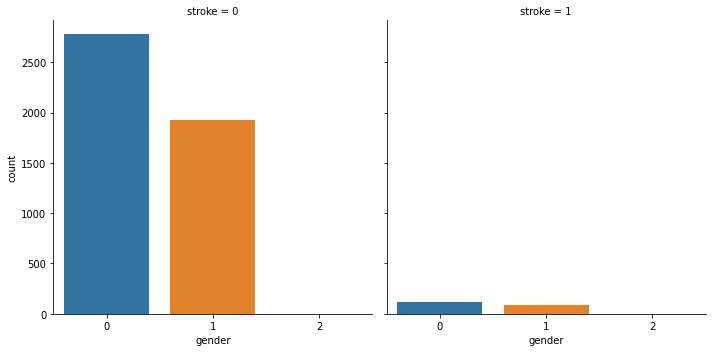

In [ ]:
sns.catplot(x='gender',kind='count',col='stroke',data=stroke)

### **Jak zadziała sieć nauczona na konkretnej płci na płeć przeciwną?**

W związku z tym, że zbiory mają różne rozmiary, do przeprowadzenia doświadczenia w niektórych momentach trzeba będzie wziąść wybrane przedziały zbioru tak, aby zmieścił się w teście.

In [ ]:
print(Y_test_female.size)
print(Y_test_male.size)

580
403


**Użycie sieci nauczonej na datasecie kobiet na teście mężczyzn**

Testując dataset mężczyzn siecią kobiet można zauważyć spadek accuracy o  2,73% dla sieci.

In [ ]:
print('XGBoost Accuracy_score: ', accuracy_score(Y_test_male, predicted_values_XGB_female[:403]))
print('XGBoost confusion_matrix: \n', confusion_matrix(predicted_values_XGB_female[:403], Y_test_male))

XGBoost Accuracy_score:  0.9330024813895782
XGBoost confusion_matrix: 
 [[376  27]
 [  0   0]]


**Użycie sieci nauczonej na datasecie mężczyzn na teście kobiet**

W tym przypadku sieć męższczyzn osiąga większe accuracy na teście kobiet o ok. 2,23% niż wykonując test mężczyzn.

In [ ]:
print('XGBoost Accuracy_score: ', accuracy_score(Y_test_female[:403], predicted_values_XGB_male))
print('XGBoost confusion_matrix: \n', confusion_matrix(predicted_values_XGB_male, Y_test_female[:403]))

XGBoost Accuracy_score:  0.9553349875930521
XGBoost confusion_matrix: 
 [[385  16]
 [  2   0]]


Przy obu sieciach spadek accuracy w porównaniu do właściwych testów jest bardzo zbliżony. Można jednak wywnioskować, że test kobiet daje lepsze wyniki niż test męższczyzn, bez względu na sieć. Ponownie, może to być wynikiem większej liczby kobiet po udarze w datasecie.